In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
temp_df = pd.read_csv('Temperature-change-annual-en.csv')
temp_df

,"Annual average temperature departures from the 1961 to 1990 reference value, Canada, 1948 to 2023",Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,Year,Temperature departure (degree Celsius),Warmest year ranking
2,1948,-0.2,57
3,1949,-0.2,58
4,1950,-1.2,75
...,...,...,...
77,2023,2.8,2
78,NaN,NaN,NaN
79,Note: Annual average temperature departures we...,NaN,NaN
80,Source: Environment and Climate Change Canada ...,NaN,NaN


In [3]:
# Dropping rows by index labels
temperature_df = temp_df.drop(index=[0,1,78,79,80,81])  
temperature_df

,"Annual average temperature departures from the 1961 to 1990 reference value, Canada, 1948 to 2023",Unnamed: 1,Unnamed: 2
2,1948,-0.2,57
3,1949,-0.2,58
4,1950,-1.2,75
5,1951,-0.6,69
6,1952,0.8,24
...,...,...,...
73,2019,1.1,18
74,2020,1.2,16
75,2021,2.1,6
76,2022,1.2,17


In [4]:
temperature_df.rename(columns={'Annual average temperature departures from the 1961 to 1990 reference value, Canada, 1948 to 2023': 'Year',
    'Unnamed: 1': 'Temperature_Departure',
                               'Unnamed: 2' : 'Warmest year ranking'}, inplace=True)
temperature_df

,Year,Temperature_Departure,Warmest year ranking
2,1948,-0.2,57
3,1949,-0.2,58
4,1950,-1.2,75
5,1951,-0.6,69
6,1952,0.8,24
...,...,...,...
73,2019,1.1,18
74,2020,1.2,16
75,2021,2.1,6
76,2022,1.2,17


In [5]:
print(temperature_df.isnull().sum())

Year                     0
Temperature_Departure    0
Warmest year ranking     0
dtype: int64


In [6]:
temperature_df.dtypes

Year                     object
Temperature_Departure    object
Warmest year ranking     object
dtype: object

In [9]:
# Strip any extra spaces and convert "Temperature_Departure" to numeric
temperature_df["Temperature_Departure"] = temperature_df["Temperature_Departure"].astype(str).str.strip()  # Remove spaces
temperature_df["Temperature_Departure"] = pd.to_numeric(temperature_df["Temperature_Departure"], errors='coerce')  # Convert to float

# Convert "Year" column to numeric (integer)
temperature_df["Year"] = pd.to_numeric(temperature_df["Year"], errors='coerce')


# Check if conversion worked
print(temperature_df.dtypes)  

Year                       int64
Temperature_Departure    float64
Warmest year ranking      object
dtype: object


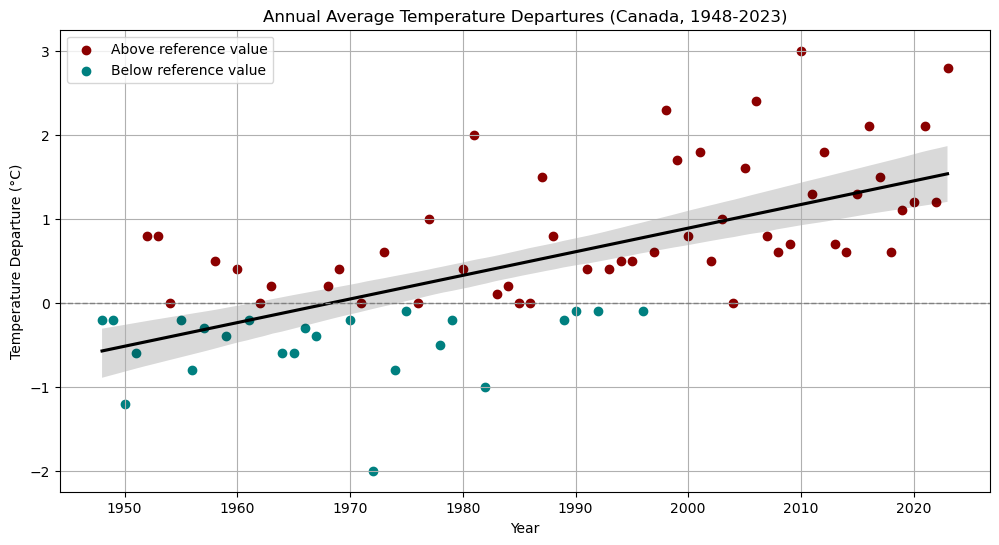

In [10]:
# Separate data above and below 0°C
above = temperature_df[temperature_df["Temperature_Departure"] >= 0]
below = temperature_df[temperature_df["Temperature_Departure"] < 0]

# Create the plot
plt.figure(figsize=(12, 6))

# Scatter plot for above and below reference temperature
plt.scatter(above["Year"], above["Temperature_Departure"], color='darkred', label="Above reference value")
plt.scatter(below["Year"], below["Temperature_Departure"], color='teal', label="Below reference value")

# Add a linear trend line
sns.regplot(x="Year", y="Temperature_Departure", data=temperature_df, scatter=False, color='black', 
            line_kws={'label': "Linear trend line"})

# Formatting the plot
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)  # Reference line at 0°C
plt.xlabel("Year")
plt.ylabel("Temperature Departure (°C)")
plt.title("Annual Average Temperature Departures (Canada, 1948-2023)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()